My initial idea sought to compare sugar and/or corn sales with diagnosed diabetes per state.

After sifting through hundreds of APIs, I came to realize that such a call was a bit overambitious. 
However, I inevitably stumbled upon a way to preserve the spirit of the project: a lovely website with a multitude of legitimate healthcare and government resource datasets.

Not only did I have solid population data, I also gained access to a Diabetes Prevalence statistic for individuals 20 and older, enabling a population estimate to be calculated from an equation involving specific columns. Most importantly, this offered opportunity to grow in the visualization department.

OBJECTIVES:

1. Read in two datasets from API calls.

First, let's import our required modules:

In [1]:
import requests as req
import pandas as pd
import matplotlib.pyplot as plt

The first API pull provides population information for all fifty states, the District of Columbia, and Puerto Rico.

In [2]:
response = req.get("https://datausa.io/api/data?drilldowns=State&measures=Population&year=2020")
json = response.json()
population = pd.json_normalize(data = json, record_path = ["data"])
population.head(8)

,ID State,State,ID Year,Year,Population,Slug State
0,04000US01,Alabama,2020,2020,4893186,alabama
1,04000US02,Alaska,2020,2020,736990,alaska
2,04000US04,Arizona,2020,2020,7174064,arizona
3,04000US05,Arkansas,2020,2020,3011873,arkansas
4,04000US06,California,2020,2020,39346023,california
5,04000US08,Colorado,2020,2020,5684926,colorado
6,04000US09,Connecticut,2020,2020,3570549,connecticut
7,04000US10,Delaware,2020,2020,967679,delaware


Let's clean first, by clearing redundant columns, like ID State (column 0) and Slug State (column 5). By incorporating the year into the Population column, ID Year and Year (columns 2 and 3) may also be removed, simplifying the data further.

In [3]:
population.drop(population.columns[[0,2,3,5]], axis=1, inplace=True)
population.rename(columns = {"Population":"Population (2020)"}, inplace = True)
population

,State,Population (2020)
0,Alabama,4893186
1,Alaska,736990
2,Arizona,7174064
3,Arkansas,3011873
4,California,39346023
5,Colorado,5684926
6,Connecticut,3570549
7,Delaware,967679
8,District of Columbia,701974
9,Florida,21216924


The second API call gathers the Diabetes Prevalence, a statistic for the diagnosis of diabetes in adults 20 and up.

In [4]:
responseTwo = req.get("https://datausa.io/api/data?drilldowns=State&measures=Diabetes%20Prevalence&year=2020")
jsonTwo = responseTwo.json()
prevalence = pd.json_normalize(data = jsonTwo, record_path = ["data"])
prevalence.head(8)

,ID State,State,ID Year,Year,Diabetes Prevalence,Slug State
0,04000US01,Alabama,2020,2020,0.142,alabama
1,04000US02,Alaska,2020,2020,0.079,alaska
2,04000US04,Arizona,2020,2020,0.097,arizona
3,04000US05,Arkansas,2020,2020,0.134,arkansas
4,04000US06,California,2020,2020,0.086,california
5,04000US08,Colorado,2020,2020,0.063,colorado
6,04000US09,Connecticut,2020,2020,0.089,connecticut
7,04000US10,Delaware,2020,2020,0.115,delaware


This dataframe has the same redundant state and year columns as the first, down to the same column index numbers, and we will clean them similarly.

In [5]:
prevalence.drop(prevalence.columns[[0,2,3,5]], axis=1, inplace=True)
prevalence

,State,Diabetes Prevalence
0,Alabama,0.142
1,Alaska,0.079
2,Arizona,0.097
3,Arkansas,0.134
4,California,0.086
5,Colorado,0.063
6,Connecticut,0.089
7,Delaware,0.115
8,District of Columbia,0.081
9,Florida,0.106


2. Clean the data, perform a pandas merge, and calculate values based on the new dataset.

With the data cleaned and prepared, the merge is ready to be performed.

In [6]:
estimate = population.merge(prevalence, left_on="State", right_on="State")
estimate.head(8)

,State,Population (2020),Diabetes Prevalence
0,Alabama,4893186,0.142
1,Alaska,736990,0.079
2,Arizona,7174064,0.097
3,Arkansas,3011873,0.134
4,California,39346023,0.086
5,Colorado,5684926,0.063
6,Connecticut,3570549,0.089
7,Delaware,967679,0.115


Factoring in the Prevalence statistic excluding ages 0-19 (a group representing 25 percent of the total U.S. population), an equation to estimate the diabetic population per state was derived.

In [7]:
estimate["Diabetic Population Estimate"] = estimate["Population (2020)"] * 0.75 * estimate["Diabetes Prevalence"]
estimate["Diabetic Population Estimate"] = estimate["Diabetic Population Estimate"].astype(int)
estimate

,State,Population (2020),Diabetes Prevalence,Diabetes Population Estimate
0,Alabama,4893186,0.142,521124
1,Alaska,736990,0.079,43666
2,Arizona,7174064,0.097,521913
3,Arkansas,3011873,0.134,302693
4,California,39346023,0.086,2537818
5,Colorado,5684926,0.063,268612
6,Connecticut,3570549,0.089,238334
7,Delaware,967679,0.115,83462
8,District of Columbia,701974,0.081,42644
9,Florida,21216924,0.106,1686745


The Diabetic Population Estimate represents the minimum number of people that should have free access to insulin.

Puerto Rico did not have a Diabetes Prevalence statistic provided, it does not survive the merge. The District of Columbia *did* have one; therefore, it makes the cut.

This final dataframe can be sorted to see the highest and lowest states regarding their Population in 2020, their diabetes prevalence, and the diabetic population estimate.

In [8]:
estimate.sort_values(by="Population (2020)", ascending=False).head(8)

,State,Population (2020),Diabetes Prevalence,Diabetes Population Estimate
4,California,39346023,0.086,2537818
43,Texas,28635442,0.100,2147658
9,Florida,21216924,0.106,1686745
32,New York,19514849,0.098,1434341
38,Pennsylvania,12794885,0.106,1017193
13,Illinois,12716164,0.099,944175
35,Ohio,11675275,0.118,1033261
10,Georgia,10516579,0.118,930717


In [9]:
estimate.sort_values(by="Population (2020)").head(8)

,State,Population (2020),Diabetes Prevalence,Diabetes Population Estimate
50,Wyoming,581348,0.087,37932
45,Vermont,624340,0.084,39333
8,District of Columbia,701974,0.081,42644
1,Alaska,736990,0.079,43666
34,North Dakota,760394,0.090,51326
41,South Dakota,879336,0.099,65290
7,Delaware,967679,0.115,83462
39,Rhode Island,1057798,0.095,75368


In [10]:
estimate.sort_values(by="Diabetes Prevalence", ascending=False).head(8)

,State,Population (2020),Diabetes Prevalence,Diabetes Population Estimate
48,West Virginia,1807426,0.149,201979
24,Mississippi,2981835,0.146,326510
0,Alabama,4893186,0.142,521124
3,Arkansas,3011873,0.134,302693
42,Tennessee,6772268,0.128,650137
40,South Carolina,5091517,0.128,488785
18,Louisiana,4664616,0.128,447803
17,Kentucky,4461952,0.126,421654
36,Oklahoma,3949342,0.122,361364
14,Indiana,6696893,0.119,597697


In [15]:
estimate.sort_values(by="Diabetes Prevalence").head(8)

,State,Population (2020),Diabetes Prevalence,Diabetes Population Estimate
5,Colorado,5684926,0.063,268612
44,Utah,3151239,0.071,167803
1,Alaska,736990,0.079,43666
26,Montana,1061705,0.081,64498
8,District of Columbia,701974,0.081,42644
23,Minnesota,5600166,0.083,348610
45,Vermont,624340,0.084,39333
4,California,39346023,0.086,2537818


In [11]:
estimate.sort_values(by="Diabetic Population Estimate", ascending=False).head(8)

,State,Population (2020),Diabetes Prevalence,Diabetes Population Estimate
4,California,39346023,0.086,2537818
43,Texas,28635442,0.100,2147658
9,Florida,21216924,0.106,1686745
32,New York,19514849,0.098,1434341
35,Ohio,11675275,0.118,1033261
38,Pennsylvania,12794885,0.106,1017193
13,Illinois,12716164,0.099,944175
10,Georgia,10516579,0.118,930717
33,North Carolina,10386227,0.112,872443
22,Michigan,9973907,0.108,807886


In [16]:
estimate.sort_values(by="Diabetic Population Estimate").head(8)

,State,Population (2020),Diabetes Prevalence,Diabetes Population Estimate
50,Wyoming,581348,0.087,37932
45,Vermont,624340,0.084,39333
8,District of Columbia,701974,0.081,42644
1,Alaska,736990,0.079,43666
34,North Dakota,760394,0.090,51326
26,Montana,1061705,0.081,64498
41,South Dakota,879336,0.099,65290
39,Rhode Island,1057798,0.095,75368


3. Make one Pandas pivot table and one Matplotlib plot.

The pivot table places the estimated populations of each state into ascending order, and contains the population and prevalence values that created them.

In [12]:
estimate.pivot_table(index=["Diabetic Population Estimate", "State"], values=["Diabetes Prevalence", "Population (2020)"])

,,Diabetes Prevalence,Population (2020)
Diabetes Population Estimate,State,,
37932,Wyoming,0.087,581348
39333,Vermont,0.084,624340
42644,District of Columbia,0.081,701974
43666,Alaska,0.079,736990
51326,North Dakota,0.090,760394
64498,Montana,0.081,1061705
65290,South Dakota,0.099,879336
75368,Rhode Island,0.095,1057798
83462,Delaware,0.115,967679


The first plot serves as a refresher of the Diabetes Prevalence statistic that brought us here.

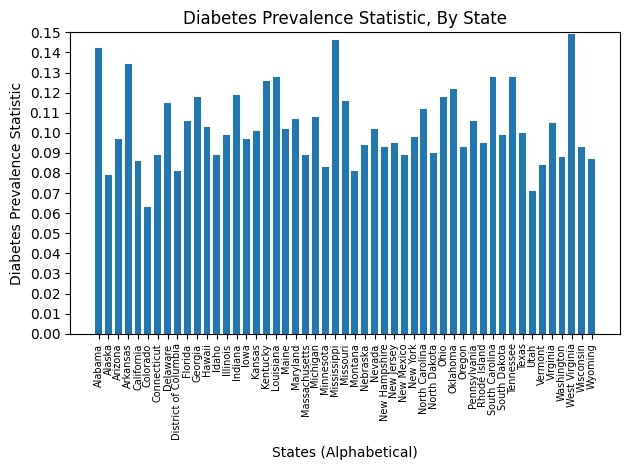

In [13]:
plt.bar("State", "Diabetes Prevalence", width=0.7, data=estimate)
plt.xlabel("States (Alphabetical)")
plt.xticks(fontsize=7, rotation=90)
plt.ylabel("Diabetes Prevalence Statistic")
plt.ylim(0,0.15)
plt.yticks(ticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15])
plt.title("Diabetes Prevalence Statistic, By State")
plt.tight_layout()
plt.show()

West Virginia had the highest prevalence statistic value, followed by Mississippi and Alabama.

The second and more crucial plot contains the estimated diabetic populations for all 50 states and the District of Columbia.

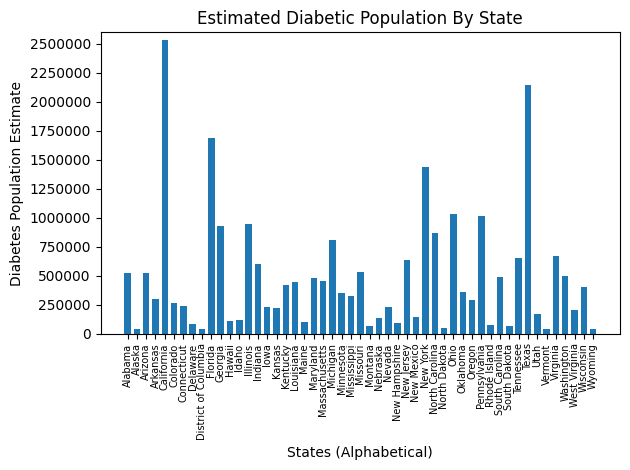

In [14]:
plt.bar("State", "Diabetic Population Estimate", width=0.7, data=estimate)
plt.xlabel("States (Alphabetical)")
plt.xticks(fontsize=7, rotation=90)
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("Diabetic Population Estimate")
plt.ylim(0,2600000)
plt.yticks(ticks=[0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2250000, 2500000])
plt.title("Estimated Diabetic Population By State")
plt.tight_layout()
plt.show()

West Virginia is only 35th in this ranking. California is up top, followed by Texas and Florida.

---

4. Build a custom data dictionary

Included in the README that prefaces and accompanies this project.

---

5. Thoroughly annotated Jupyter notebook with a detailed README.md

Having documented my thought process and the journey, and adjusted upon feedback and further growth, I present this thoroughly annotated Jupyter notebook with detailed README. 

---

Conclusion:

This second project required much more thought and energy than the first. However, with a smoother schedule and comfort level far higher than last cohort, I undertook a far more composed and methodical path to completion. Making daily commits a habit, I was more than content with my pacing and growth - my attention was often kept on progress, not problems.

The plots and data were able to draw a few entertaining bits of information, and my growth on the plotting and visualization front helped bring that out, and affirm I'm on the right learning path. 

Code Louisville was a tall task to jump into, especially concurrent with a college return, but I felt so supported and strengthened by the entire experience. I've met so many great folks along the way, brilliant and giving minds, and I'm incredibly thankful to have learned so much in such a short time. I have invaluable experience with systems that once intimidated me by their mere mention - *cough* GitHub *cough* - and I am ready to take on a career path with far greater resolve. Thank you for your time, truly.